# PyAMPR Demonstration

This notebook demonstrates some of the capabilitites of `PyAMPR`.

Install `pyampr` via `python setup.py install` in the `pyampr` source directory. If you want to write out KML/KMZ files then you must install `simplekml` (https://pypi.python.org/pypi/simplekml/ ).

`PyAMPR` is an open-source, object-oriented Python framework for quickly and easily reading, processing, and visualizing AMPR data. It has been developed and tested at NASA Marshall Space Flight Center. Besides the aforementioned `simplekml`, `PyAMPR` utilizes the `__future__`, `numpy`, `matplotlib`, `cartopy`, `os`, `datetime`, `calendar`, `time`, `gzip`, `netCDF4`, and `codecs` modules. `PyAMPR` is known to work with Python 2.7 thru Python 3.7. 

One of the main components of `PyAMPR` is the `AmprTb` class. See below how, with this class, one can quickly read and store in memory an entire field project's worth of AMPR data, if desired. In my working directory, I have placed all the AMPR Level 1B data files from the MC3E field campaign in 2011. These data are available from http://ghrc.nsstc.nasa.gov/ .

In [1]:
import sys
print(sys.version)

3.7.1 | packaged by conda-forge | (default, Nov 13 2018, 10:30:07) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
########################################
# Example initialization of class AmprTb
########################################
from __future__ import print_function
import pyampr
import glob
import os
%matplotlib inline

# We read in all AMPR data from MC3E and store as a dictionary of AmprTb classes.
print()
print('Reading in all MC3E data and storing as dict of AmprTb classes')
print()

# Change file & directory names as needed
files = sorted(glob.glob('/Volumes/Storage01/AMPR/MC3E/*.txt'))
print('Available files')
for file in files:
    print(file)

mc3e_data = {}

for ftitle in files:
    fname = os.path.basename(ftitle)
    fdate = fname[10:18]  # String date format: YYYYMMDD
    if fdate == '20110524' or fdate == '20110420':  # Remove this test to read in everything
        data = pyampr.AmprTb(ftitle, project='MC3E')  # Instantiate AmprTb class  
        mc3e_data[fdate] = data  # Append to dictionary

# Output demonstration
print()
print('Output Demo')
print('-----------')
# print all available dates
print()
print('Available dates')
print(mc3e_data.keys())


Reading in all MC3E data and storing as dict of AmprTb classes

Available files
/Volumes/Storage01/AMPR/MC3E/mc3e_ampr_20110419_tbs_v01.txt
/Volumes/Storage01/AMPR/MC3E/mc3e_ampr_20110420_tbs_v01.txt
/Volumes/Storage01/AMPR/MC3E/mc3e_ampr_20110422_tbs_v01.txt
/Volumes/Storage01/AMPR/MC3E/mc3e_ampr_20110425_tbs_v01.txt
/Volumes/Storage01/AMPR/MC3E/mc3e_ampr_20110427_tbs_v01.txt
/Volumes/Storage01/AMPR/MC3E/mc3e_ampr_20110507_tbs_v01.txt
/Volumes/Storage01/AMPR/MC3E/mc3e_ampr_20110508_tbs_v01.txt
/Volumes/Storage01/AMPR/MC3E/mc3e_ampr_20110511_tbs_v01.txt
/Volumes/Storage01/AMPR/MC3E/mc3e_ampr_20110518_tbs_v01.txt
/Volumes/Storage01/AMPR/MC3E/mc3e_ampr_20110520_tbs_v01.txt
/Volumes/Storage01/AMPR/MC3E/mc3e_ampr_20110524_tbs_v01.txt
/Volumes/Storage01/AMPR/MC3E/mc3e_ampr_20110529_tbs_v01.txt
/Volumes/Storage01/AMPR/MC3E/mc3e_ampr_20110601_tbs_v01.txt
/Volumes/Storage01/AMPR/MC3E/mc3e_ampr_20110603_tbs_v01.txt

********************
read_ampr_tb_level2b(): Reading /Volumes/Storage01/AMPR/M

OK, just what the heck is in these files? Lots of documentation, read it all!

In [3]:
help(mc3e_data['20110524'])

Help on AmprTb in module pyampr.pyampr object:

class AmprTb(builtins.object)
 |  AmprTb(full_path_and_filename=None, project='OLYMPEX')
 |  
 |  Methods defined here:
 |  
 |  __init__(self, full_path_and_filename=None, project='OLYMPEX')
 |      If passed a filename, call the read_ampr_tb_level2b() method,
 |      otherwise just instance the class with nothing
 |  
 |  calc_polarization(self, simple=False, force_match=True, chan_list=['10', '19', '37', '85'])
 |      *** THIS METHOD IS EXPERIMENTAL ***
 |      
 |      This method calculates H & V given the mixed-pol A & B channels.
 |      Solves Equation 1 in Vivekanandan et al. (1993) for Tb in H and V.
 |      Where A or B are not good will be populated with AmprTb.bad_data.
 |      If successful, TB10H, TB10V, TB19H, TB19V, TB37H, TB37V, TB85H, TB85V
 |      will now be attributes of the AmprTb instance. Missing channels will
 |      not be processed. Calculation performed via methodology of Brent Roberts.
 |      
 |      Creat

The `read_ampr_tb_level2b` method reads the ASCII files produced by Frank Lafontaine's old code for MC3E and earlier campaigns. NASA MSFC has produced a netCDF dataset for IPHEx in 2014, and will do the same for OLYMPEX (2015). The `read_ampr_tb_level2b` method also reads these newer netCDF files.

### Plotting Demonstration

Let's plot the track for the 85 GHz (A) channel from 5/24/11. This is a mixed-pol channel - it starts out pure V at the left edge of the swath, and changes over to pure H at the right edge (B channels do the opposite). We can save these images as a file if desired.

In [4]:
print(mc3e_data['20110524'].Longitude.shape)

(3380, 50)


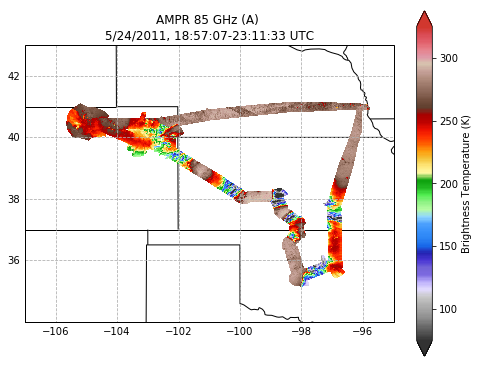

In [5]:
mc3e_data['20110524'].plot_ampr_track('85A', latrange=[34, 43], lonrange=[-107, -95],
                                      save='ampr_track_85A_ll_34N_107W_ur_43N_95W.png')

`plot_ampr_track` has multiple options. For instance, you can change the color map (along with min/max colors), you can show the aircraft track in black with maneuver times in white, and you can adjust the scan range (values outside the range of available scans will simply default to the scan limits).

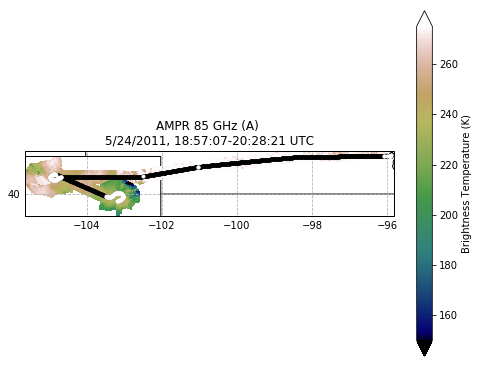

In [6]:
mc3e_data['20110524'].plot_ampr_track('85A', cmap='gist_earth', 
                                       show_track=True, scanrange=[0, 2400], clevs=[150, 275])

The default for `plot_ampr_track` is to plot 10 GHz (A), use `amprTB_cmap` (defined in the `udf_cmap` sub-module of `pyampr`) for colors, and plot the whole track with limits defined by the data lat/lon range. Note in the following case how missing data show up as black. If you want to overplot other data, you can set `return_flag=True` to return `figure`, `axes`, etc. variables for later adjustment.

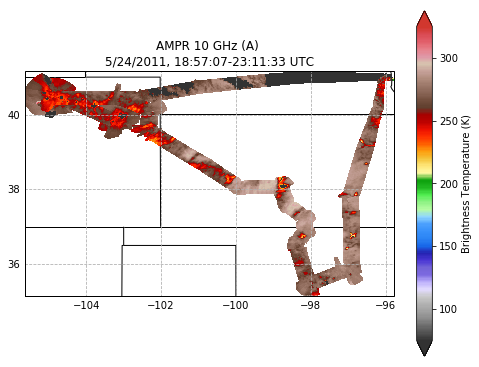

In [7]:
mc3e_data['20110524'].plot_ampr_track()

You can add a WMTS map layer from https://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi, like 'ASTER_GDEM_Color_Shaded_Relief'.

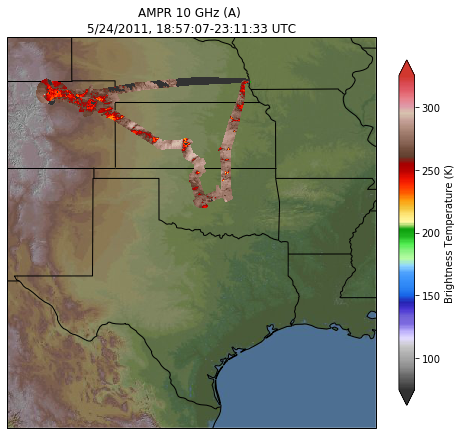

In [19]:
mc3e_data['20110524'].plot_ampr_track(wmts_layer='ASTER_GDEM_Color_Shaded_Relief',
                                      latrange=[25, 43], lonrange=[-107, -90], show_grid=False)

You can also plot up a quick 4-panel figure by doing the following:

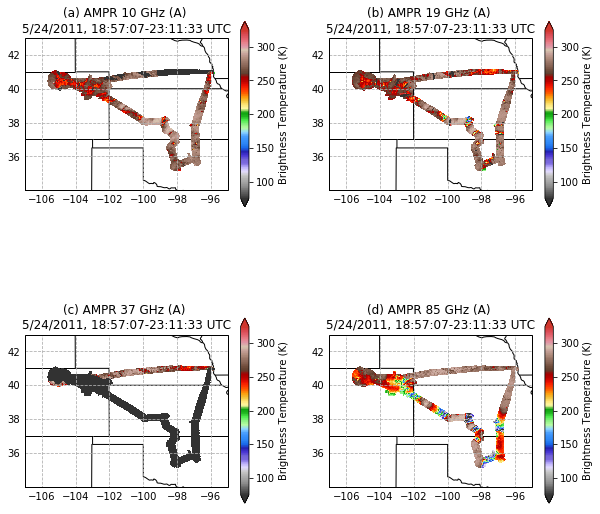

In [9]:
mc3e_data['20110524'].plot_ampr_track_4panel(chan='a', latrange=[34, 43], lonrange=[-107, -95])

A couple channels appear black because there were some data outages during this flight. The `plot_ampr_track_4panel` method accepts similar keywords to `plot_ampr_track`.

The other major plotting routine is the strip chart method, `plot_ampr_channels`. Strip charts are great for seeing how the same cloud or surface feature appears differently to different microwave channel frequencies. They are also good for spotting data quality control issues. See an example below.


********************
plot_ampr_channels():
Available scans = 1187 to 4566
Available times = 18:57:07 - 23:11:33


/Users/tjlang/anaconda3/envs/py3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


********************



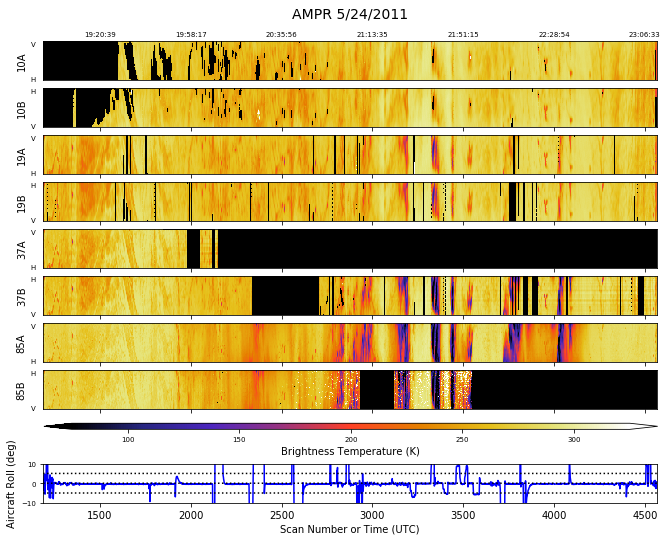

In [10]:
mc3e_data['20110524'].plot_ampr_channels(save='channels.png', cmap='CMRmap')

There are several options with this method. Probably the most important is the ability to adjust scan range. Note the text output, which lets you know what your scan options are.  You can get this text output from `plot_ampr_track` by setting `verbose=True`. The `timerange` keyword can also be used instead of `scanrange`, to accomplish the same task.


********************
plot_ampr_channels():
Available scans = 1187 to 4566
Available times = 18:57:07 - 23:11:33
Scan number too small, using first scan for beginning
********************



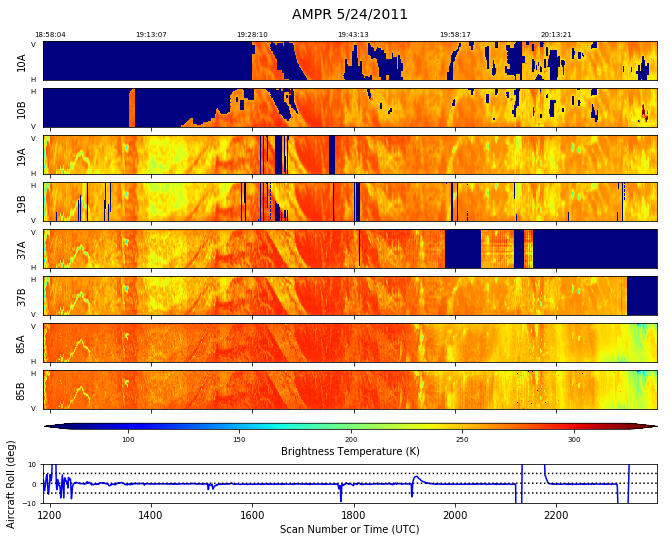

In [11]:
mc3e_data['20110524'].plot_ampr_channels(scanrange=[0, 2400], cmap='jet')

So let's focus on just a 1000-scan range from shortly after takeoff on this day.


********************
plot_ampr_channels():
Available scans = 1187 to 4566
Available times = 18:57:07 - 23:11:33
********************



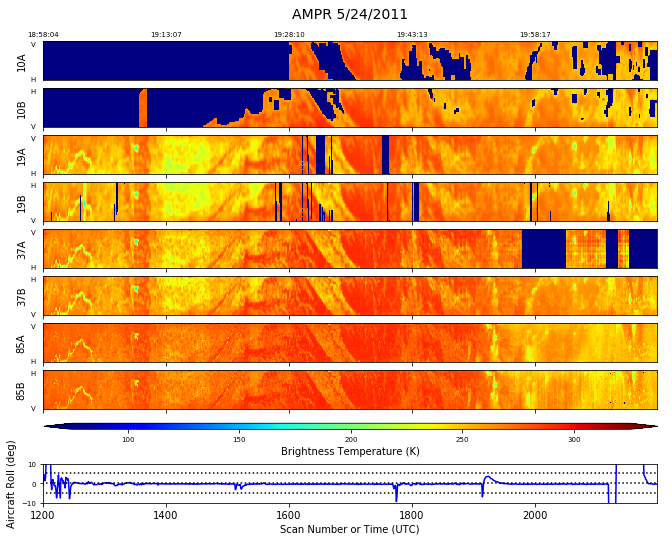

In [12]:
mc3e_data['20110524'].plot_ampr_channels(scanrange=[1200, 2200], cmap='jet')

### Polarization Deconvolution

We have the abiliy to deconvolve distinct H & V polarizations from the mixed-pol data. Here's an example for an overwater flight on 4/20/11.

In [13]:
mc3e_data['20110420'].calc_polarization()


********************
calc_polarization():
Calculating for 10 GHz channel
Calculating for 19 GHz channel
Calculating for 37 GHz channel
Calculating for 85 GHz channel
0.07164788246154785 seconds to calculate H & V
If successful, following attributes are now available:
TB10H TB10V TB19H TB19V TB37H TB37V TB85H TB85V 
********************



Let's plot it up, see what we see. Note how I commit some typos with the channel name (lower case v) and the lonrange (out of order). PyAMPR can handle minor issues like that.

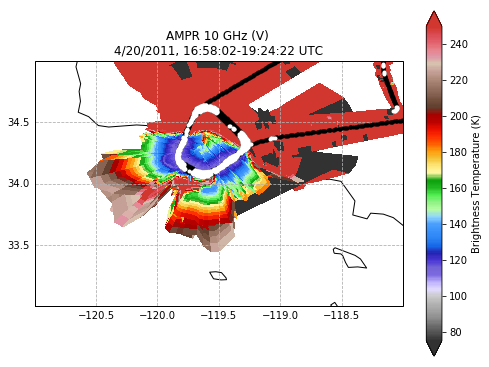

In [14]:
mc3e_data['20110420'].plot_ampr_track('10v', clevs=[75,250], show_track=True, 
                                      latrange=[33,35], lonrange=[-118,-121], 
                                      meridians=0.5, parallels=0.5)

The example is from a test flight off the Southern California coast. Land (including Catalina Island) shows up as high TBs (red/pink). The ER2 flew racetrack patterns this day, half over the ocean, half over land. The 10 GHz (V) channel shows increasing TBs off nadir over the ocean, as expected from theory, while the 10 GHz (H) channel (below) shows the opposite, again as expected.

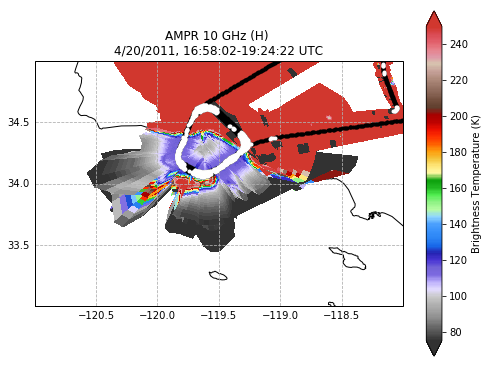

In [15]:
mc3e_data['20110420'].plot_ampr_track('10h', clevs=[75,250], show_track=True, 
                                      latrange=[35,33], lonrange=[-118,-121], 
                                      meridians=0.5, parallels=0.5, resolution='10m')

Strip charts with H & V are also available, just set the `show_pol` keyword to `True`. If H & V are not yet calculated, `plot_ampr_channels` will call `calc_polarization` before plotting. Note that if either the A or B channel is missing data, both H and V cannot be calculated for that particular portion of the track. Thus, expect more missing data in the deconvolved channels (e.g., 37 GHz in the example below, where the 37A channel was down by this time of the flight).


********************
plot_ampr_channels():
Available scans = 247 to 2190
Available times = 16:58:02 - 19:24:22
********************



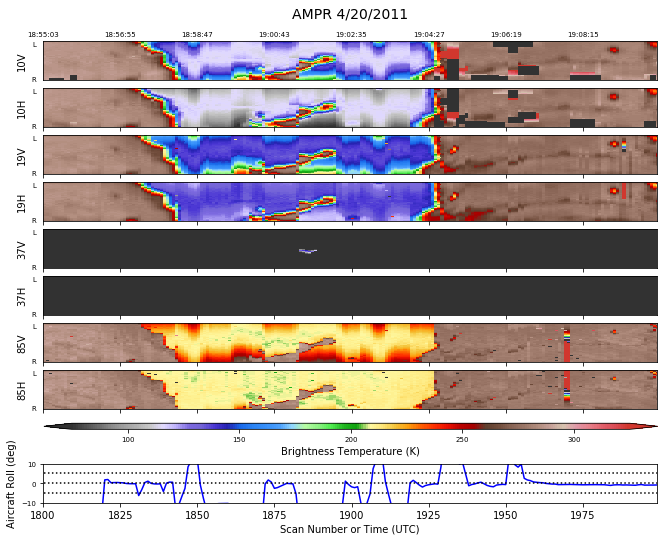

In [16]:
mc3e_data['20110420'].plot_ampr_channels(show_pol=True, scanrange=[1800, 2000])

### Writing a Google Earth image

There is a method in `PyAMPR` for creating a KMZ file that contains track-based imagery. It requires the `google_earth_tools` package installed along with `PyAMPR`. The method is `write_ampr_kmz`, which also requires you to install `simplekml` (https://pypi.python.org/pypi/simplekml/). This creates a `pyplot.pcolormesh` image very similar to `plot_ampr_track`.


********************
write_ampr_kmz():
Available scans = 1187 to 4566
Available times = 18:57:07 - 23:11:33
Google Earth image hopefully written to: ampr_test.kmz
********************



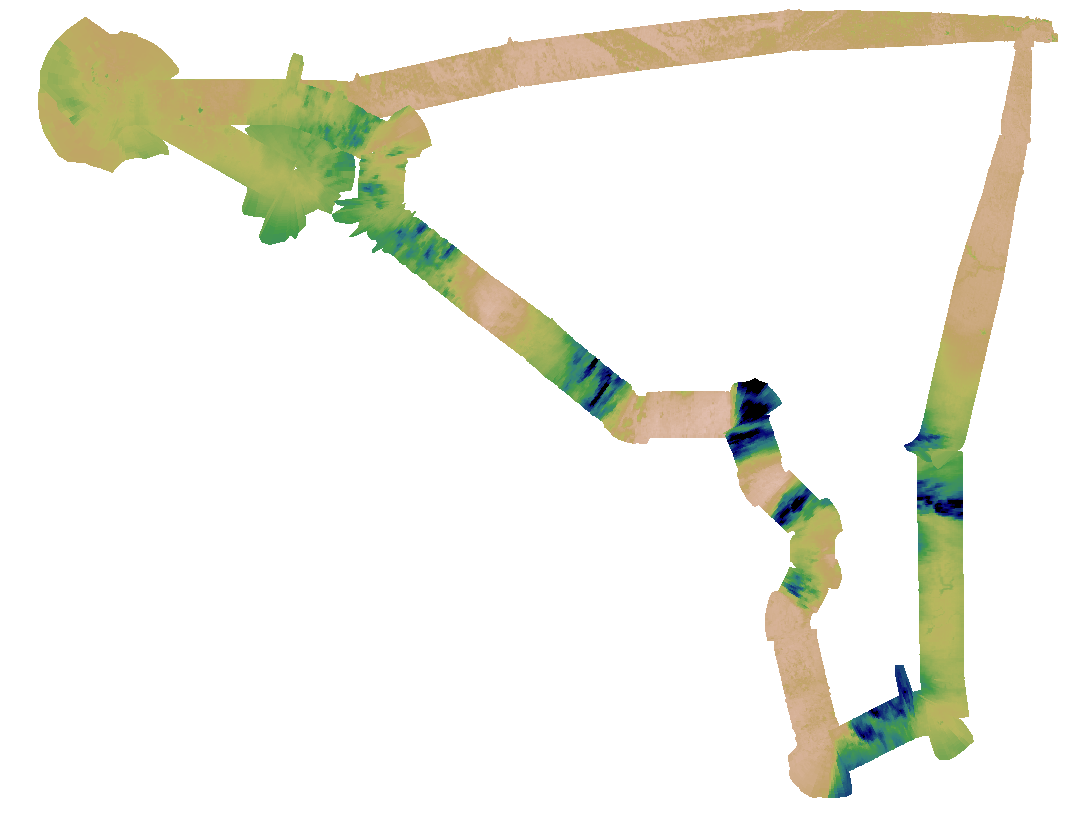

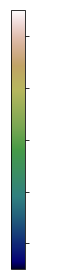

In [20]:
mc3e_data['20110524'].write_ampr_kmz('85a', file_name='ampr_test.kmz', cmap='gist_earth')

Kinda blank, huh? But go check out the KMZ that was created. It will load in Google Earth and show the geolocated track imagery with a labeled colorbar anchored to the lower left. The temporary image files `overlay.png` and `legend.png` will be created in the working directory. They can be safely ignored or deleted (`PyAMPR` leaves them alone after creation, and overwrites them if this method is re-run).

If the legend is not desired, you can set the `show_legend` argument to `False`, like below. Also, if you don't specify a file or path name, it will write to the working directory a file called `YYYYMMDD_TB###.kmz`, where `###` = channel. Look for something like that in your working directory after execution. We can also adjust the scan range plotted.


********************
write_ampr_kmz():
Available scans = 1187 to 4566
Available times = 18:57:07 - 23:11:33
Google Earth image hopefully written to: 20110524_202824z_TB85A.kmz
********************



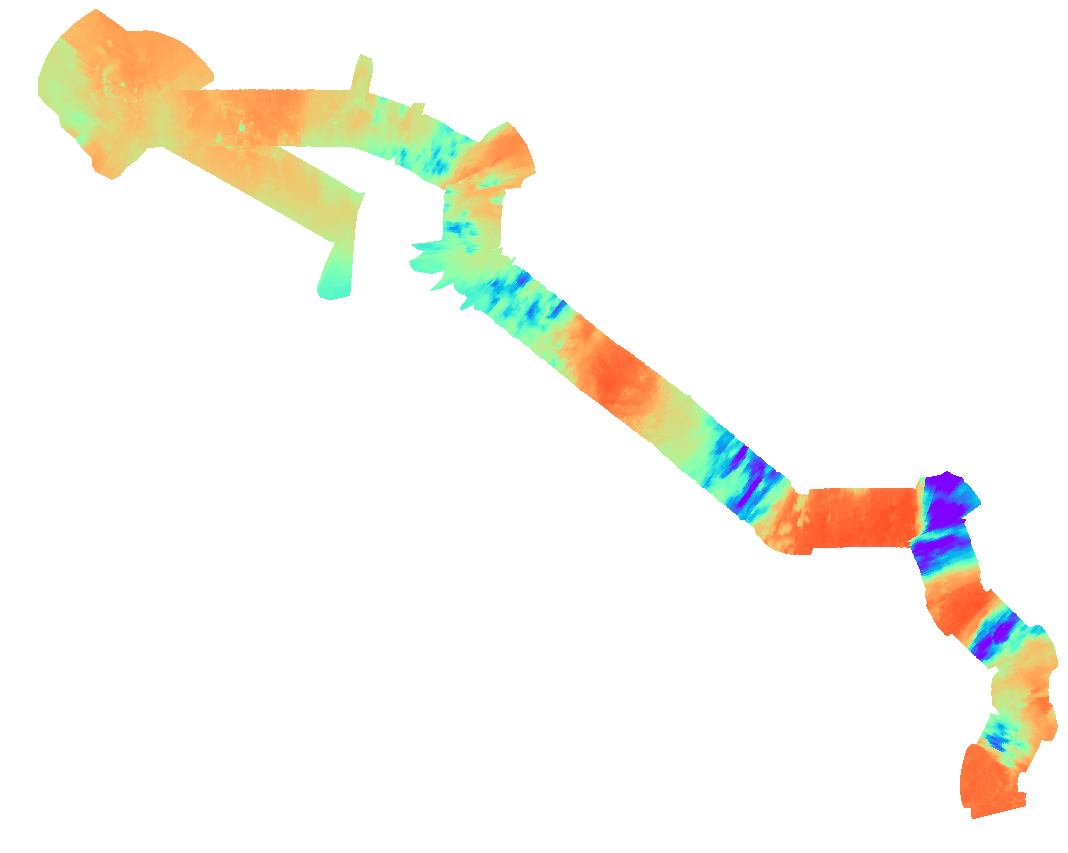

In [21]:
mc3e_data['20110524'].write_ampr_kmz(cmap='rainbow', show_legend=False, 
                                     scanrange=[2400, 3600], var='85a')

If you look at the help for this method, you will see that you can specify the scan range, contour levels, output directory, etc. as well. The `write_ampr_kmz` method also allows you to limit the lat/lon range if desired.